For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [154]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

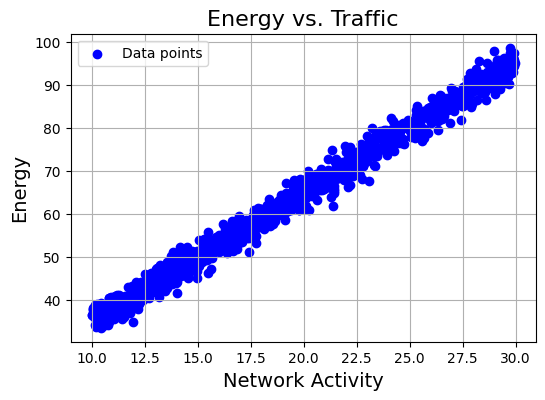

In [156]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

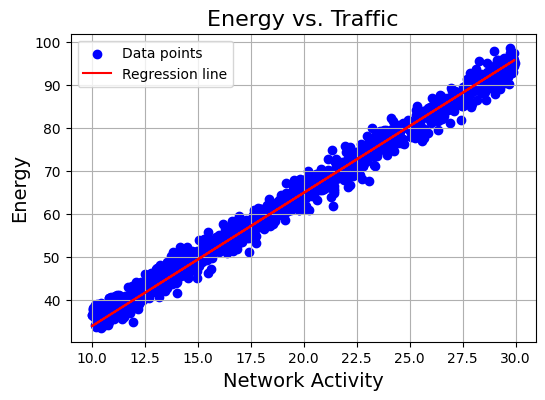

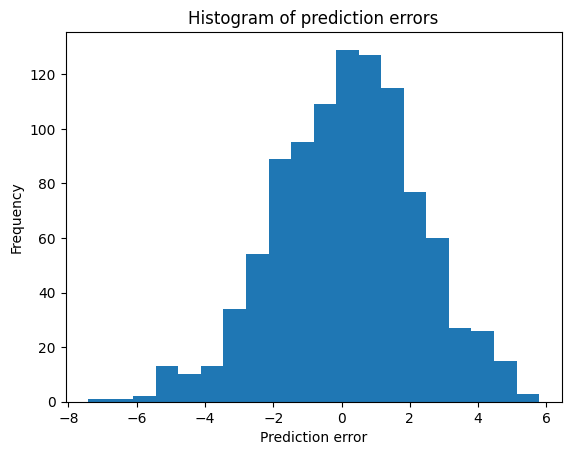

In [157]:
X = data[['Net_Activity']]  # must be 2D
y = data['Energy']

# Fit regression
lr = LinearRegression()
lr.fit(X, y)

# Predict values for a smooth line
y_line = lr.predict(X)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X, y, c='blue', label='Data points')
plt.plot(X, y_line, c='red', label='Regression line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

plt.hist(y - y_line, bins=20)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.show()

In [158]:
w, b = lr.get_params()
print("Given traffic X_0")
print(f"The energy consumption forumula is {w[0]:.3f}*X_0 + {b:.3f}")

Given traffic X_0
The energy consumption forumula is 3.112*X_0 + 2.663


2.a) Creating a historgram of our prediction errors, with 20 buckets, we can see that our errors are centering around 0, making our model a good fit. We see that we have errors on both sides, meaning that we do not have a systematic bias under or over. 

An unbiased estimator is unbiased if it produces an estimated value equals the underlying value, on average across many samples. We see in our model that we do have some loss, but it is centered around 0. We don't necessarily wan't to have zero loss, as that could overfit our model to the training data.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [159]:
from logistical_regression import LogisticRegression
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

train['product'] = train['x0'] * train['x1']
test['product'] = test['x0'] * test['x1']
x = train[['x0', 'x1', 'product']] # Should probably also be x1
y = train['y']

lr = LogisticRegression()
lr.fit(x, y)

x_test = test[['x0', 'x1', 'product']]
y_line = lr.predict(x_test)

accuracy = lr.accuracy(test['y'], y_line)
print(accuracy)


0.902


/var/folders/mc/wvwz110s67bf1rtzf2d8m1ph0000gn/T/ipykernel_38170/1036595026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['product'] = train['x0'] * train['x1']
/var/folders/mc/wvwz110s67bf1rtzf2d8m1ph0000gn/T/ipykernel_38170/1036595026.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['product'] = test['x0'] * test['x1']


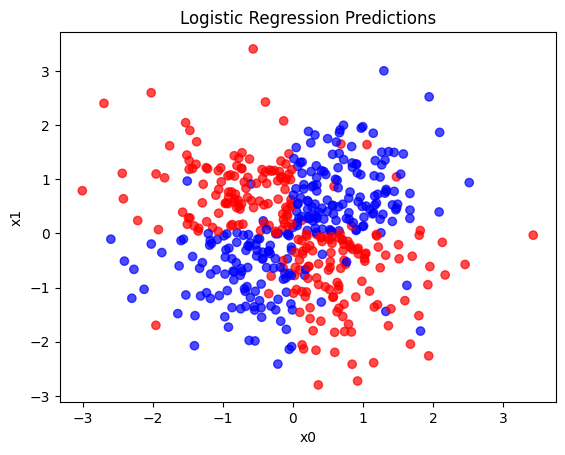

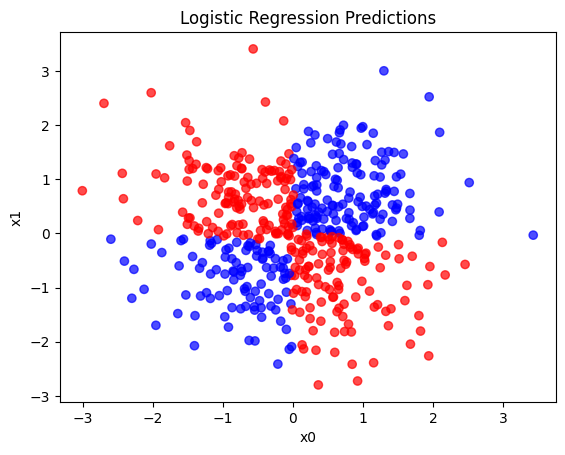

In [160]:
plt.scatter(x_test['x0'], x_test['x1'], c=test['y'], cmap="bwr", alpha=0.7)
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("Logistic Regression Predictions")
plt.show()

plt.scatter(x_test['x0'], x_test['x1'], c=y_line, cmap="bwr", alpha=0.7)
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("Logistic Regression Predictions")
plt.show()

### Discussion tasks, 3

a) The poor initial performance was because we were using a linear model on data that could not be classified linearly. We improved it by introducing a new feature, the product of the two existing features, that allows us to classify it linearly. This resulted in an increase from 47~% to 90~%.

b) The models inductive bias is to separate negative and positive numbers.

c) Yes it can solve the problem (see cell below), it simply is a different strategy to classify data into categories.

shape (500, 3) (3,)


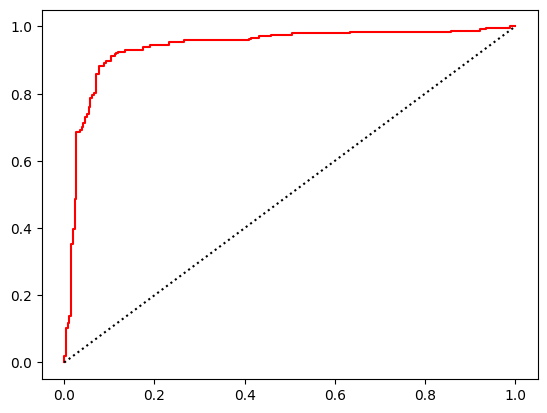

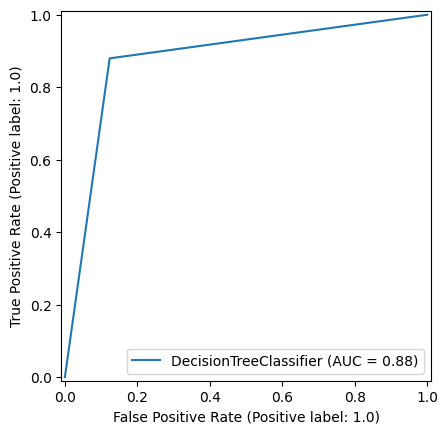

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(train[['x0', 'x1']], train['y'])

y_pred = classifier.predict(test[['x0', 'x1']])

accuracy = accuracy_score(test['y'], y_pred)

prob_predictions = lr.predict_proba(test[['x0', 'x1', 'product']])
fpr, tpr, thresholds =roc_curve(test['y'], prob_predictions, pos_label=1)
auc = round(roc_auc_score(test['y'], prob_predictions),2)
plt.plot(fpr, tpr, label=f"ROC curve (AUC={auc})", c="red")
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")

# TODO: This should(?) be the "raw values", not the predicted values
disp = RocCurveDisplay.from_estimator(classifier, test[['x0', 'x1']], test['y'])

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

Fitting 5 folds for each of 12 candidates, totalling 60 fits


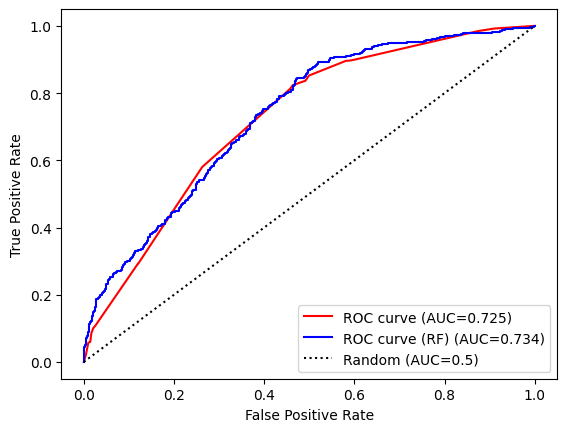

In [162]:
def is_even(x):
    # We times it by 1000, because we know the amount of decimals in ds_3
    # And we have already determined that ds_3 is the relevant one.
    return (round(x * 1000)) % 2

# Param grid for Grid search hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy']
}

param_grid_rf = {
    "max_features": ["sqrt", 0.5],     # 'sqrt' is the strong default; also try a wider fraction
    "min_samples_leaf": [1, 4],        # regularization; 1 vs a small leaf
    "max_depth": [None, 12, 20],       # either unlimited or a couple of caps
}

# Read dataset, one containing original data, one which will be converted
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

train_no_target = train.drop(columns=["target"]).copy()
test_no_target = test.drop(columns=["target"]).copy()

train_bin = train_no_target.copy().apply(is_even)
test_bin = test_no_target.copy().apply(is_even)

y_train = train["target"]
y_test = test["target"]

# Only ds_3, can probably remove loop?
# feature_cols = [c for c in train.columns if c != "target"]
feature_cols = ["data_stream_3"]
for col in feature_cols:
    # Get a fresh copy of the encrypted data, without target
    X_train = train_no_target.copy()
    X_test = test_no_target.copy()

    # Replace the current iteration with the binary format
    X_train[col] = train_bin[col]
    X_test[col] = test_bin[col]

    classifier = DecisionTreeClassifier(random_state=42)
    classifier_rf = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(
        classifier,
        param_grid,
        cv=5,
        scoring="roc_auc",
        n_jobs=-1
    )

    grid_search_rf = GridSearchCV(
        classifier_rf,
        param_grid_rf,
        cv=5,
        scoring="roc_auc",
        n_jobs=-1,
        verbose=1

    )

    grid_search.fit(X_train, y_train)
    grid_search_rf.fit(X_train, y_train)

    prob = grid_search.predict_proba(X_test)[:, 1]
    prob_rf = grid_search_rf.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(test['target'], prob, pos_label=1)
    auc = roc_auc_score(test['target'], prob)

    fpr_rf, tpr_rf, thresholds_rf = roc_curve(test['target'], prob_rf, pos_label=1)
    auc_rf = roc_auc_score(test['target'], prob_rf)

    plt.plot(fpr, tpr, label=f"ROC curve (AUC={auc:.3f})", c="red")
    plt.plot(fpr_rf, tpr_rf, label=f"ROC curve (RF) (AUC={auc_rf:.3f})", c="blue")
    plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

#### Discussion 
a) To break the treshold I used cross-validation for hyperparameter tuning. Finding out which hyperparameters affect the AUC-score, and which value ranges gave a better score. A lot of parameters were removed during trial and error as they had negligble effect.

b) See cell above for ROC-plot. We see that we have a AUC-score of 0.725. Meaning that our classification are classifying more accurately compared to a random classification (0.5).

c) 

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [163]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

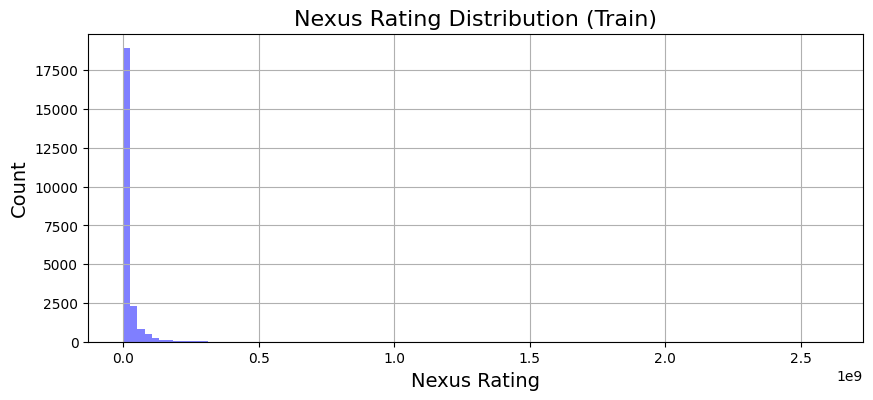

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [165]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [166]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
